# Metody Obliczeniowe w Nauce i Technice Laboratorium 10
## Dyskretna Transformacja Fouriera
### Błażej Kustra

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# numpy 1.18.1
# matplotlib 3.1.3

In [2]:
def pretty_print(arr, in_line):
    i = 0
    for item in arr:
        print(round(item,2), end=" ")
        i += 1
        if i % in_line == 0:
            print("")

### 1. FFT

1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera $F_n$ i n-elementowego wektora wejściowego ($y = F_nx$).

$$n = 2^r$$

$$[F_n]_{jk} = ξ^{jk}$$

$$ξ = e^{\frac{2 \pi i}{n}} = cos(\frac{2 \pi}{n})=i sin(\frac{2 \pi}{n}) = \overline{ω}$$



In [3]:
def resize_array(x): 
    n = pow(2, math.ceil(math.log(x.shape[0]) / math.log(2)))
    zeros = n - x.shape[0]
    return np.pad(x, (0, zeros), 'constant'), n

def DFT_matrix(n): 
    F = np.zeros((n,n), dtype=complex)    
    for i in range(n):
        for j in range(n):
            F[i][j] = np.exp(-2j * np.pi * i * j / n)
    
    return F

def DFT(x, n):
    return DFT_matrix(n) @ x

print("Input:")
x = np.array([1, 2, 3, 4, 5], dtype=complex)
x, n = resize_array(x)
pretty_print(x, 8)

print("\nZaimplementowany algorytm:")
y_DFT = DFT(x, n)
pretty_print(y_DFT, 8)

print("\nBiblioteczny algorytm:")
y_np = np.fft.fft(x)
pretty_print(y_np, 8)

Input:
(1+0j) (2+0j) (3+0j) (4+0j) (5+0j) 0j 0j 0j 

Zaimplementowany algorytm:
(15+0j) (-5.41-7.24j) (3+2j) (-2.59-1.24j) (3+0j) (-2.59+1.24j) (3-2j) (-5.41+7.24j) 

Biblioteczny algorytm:
(15+0j) (-5.41-7.24j) (3+2j) (-2.59-1.24j) (3+0j) (-2.59+1.24j) (3-2j) (-5.41+7.24j) 


Temat DFT bardzo przystępnie przedstawił ten materiał: https://www.youtube.com/watch?v=nl9TZanwbBk. 

 - Dla macierzy wejścia która nie ma n wartosci gdzie $n = 2^r (r \in N)$ musiałem dodać zera na koniec macierzy aby spełniała ten warunek. 
 - Porównałem wynik zaimpelementowanego algorytmu z funkcją "np.fft.fft()" z pakietu numpy. Wyniki okazały się zgadzać, uznałem, że algorytm zaimplementowałem poprawnie.
 - Metoda mnożenia macierzy okazuję sie jednak być zbyt czasochłonna $(O(n^2))$. Z tego powodu realnie nie stosuje się tego algorytmu na rzecz Fast Fourier Transform (TTF) $(O(n * log n))$.

2. Zaimplementuj również IDFT korzystając z tożsamosci:

$$F^{-1}_n y = \frac{\overline{F}_ny}{n} = \frac{\overline{F_n\overline{y}}}{n}$$

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną ($x = F^{-1}_ny$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

In [4]:
def IDFT(y, n):
    return np.conjugate(DFT_matrix(n) @ np.conjugate(y)) / n

In [5]:
print("Input:")
pretty_print(x, 8)

print("\nZaimplementowany algorytm:")
x_idft = IDFT(y_DFT, n)
pretty_print(x_idft, 8)

print("\nBiblioteczny algorytm:")
x_np = np.fft.ifft(y_np)
pretty_print(x_np, 8)

Input:
(1+0j) (2+0j) (3+0j) (4+0j) (5+0j) 0j 0j 0j 

Zaimplementowany algorytm:
(1+0j) (2-0j) (3-0j) (4+0j) (5-0j) (-0+0j) -0j (-0+0j) 

Biblioteczny algorytm:
(1+0j) (2+0j) (3+0j) (4+0j) (5+0j) (-0+0j) 0j 0j 


3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_n$ dla danych o różnym rozmiarze.

In [6]:
def FFT_matrix(n): 
    diag = np.zeros((n,), dtype=complex)    
    for i in range(n):
        diag[i] = np.exp(-1j * np.pi * i / n)
    
    return diag

def FFT(x, n): 
    if n == 2: return DFT_matrix(2) @ x

    even, odd = FFT(x[0::2], n // 2), FFT(x[1::2], n // 2)
    diag = FFT_matrix(n // 2)
    
    return np.array([even[k] + diag[k] * odd[k] for k in range(n // 2)] + 
                    [even[k] - diag[k] * odd[k] for k in range(n // 2)])    

In [7]:
print("Input:")
x = np.array([1, 2, 3, 4, 5], dtype=complex)
x, n = resize_array(x)
pretty_print(x, 8)

print("\nZaimplementowany algorytm:")
y_FFT = FFT(x, n)
pretty_print(y_DFT, 8)

print("\nBiblioteczny algorytm:")
y_np = np.fft.fft(x)
pretty_print(y_np, 8)

Input:
(1+0j) (2+0j) (3+0j) (4+0j) (5+0j) 0j 0j 0j 

Zaimplementowany algorytm:
(15+0j) (-5.41-7.24j) (3+2j) (-2.59-1.24j) (3+0j) (-2.59+1.24j) (3-2j) (-5.41+7.24j) 

Biblioteczny algorytm:
(15+0j) (-5.41-7.24j) (3+2j) (-2.59-1.24j) (3+0j) (-2.59+1.24j) (3-2j) (-5.41+7.24j) 


In [231]:
sizes = [2 ** size for size in range(5, 15, 2)]

for size in sizes:
    x, n = resize_array(10 * np.random.rand(size) + np.random.rand(size) * 1j)
    print("Wielkosc macierzy:", size)
    print("Zaimplementowane DFT:")
    %timeit DFT(x, n)
    
    print("Zaimplementowane FFT:")
    %timeit FFT(x, n)
    
    print("Biblioteczne FFT:")
    %timeit np.fft.fft(x)
    print("\n")

Wielkosc macierzy: 32
Zaimplementowane DFT:
1.99 ms ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Zaimplementowane FFT:
482 µs ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Biblioteczne FFT:
6.01 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Wielkosc macierzy: 128
Zaimplementowane DFT:
30.3 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Zaimplementowane FFT:
2.2 ms ± 66.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Biblioteczne FFT:
7.02 µs ± 49.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Wielkosc macierzy: 512
Zaimplementowane DFT:
471 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Zaimplementowane FFT:
9.52 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Biblioteczne FFT:
11.1 µs ± 68.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Wielkosc macierzy: 2048
Zaimplementowane DFT:
7.98 s ± 429 ms per loop (mean ± std. dev. of

Zaimplementowana funkcja Fast Fourier Transform działa.
 - Złożoność obliczeniowa to $O(n * log n)$. Można to udowodnić bo dla $n = 2^r$ możemy dzielić macierze na dwie mniejsze aż do momentu gdy ich wielkośc jest równa 2, dzięki czemu pomijamy wiele mnożeń. 
 - Różnica (DFT <-> FFT) uwidacznia się przy coraz większych macierzach wejściowych. 
 - Na przykład dla transformacji 10 sekund sygnału audio o czestotliwości 44100Hz: 
 $$n = 44100 * 10 = 4.4 * 10^5$$
 $$DFT -> O(n^2) \approx 10^{11} operacji$$
 $$FFT -> O(n* logn) \approx 10^{6} operacji$$ 
 - Algorytm FFT bardzo często nazywany jest jednym z najważniejszych algorytmów świata, dzięki któremu możliwe stało się cyfrowe przetwarzanie sygnałów, kompresja danych audio-wideo jak i wiele innych zastosowań.

###  2. DFT w 1D
1. Wygeneruj dwa sygnały czasowo-amplitudowe:

    a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

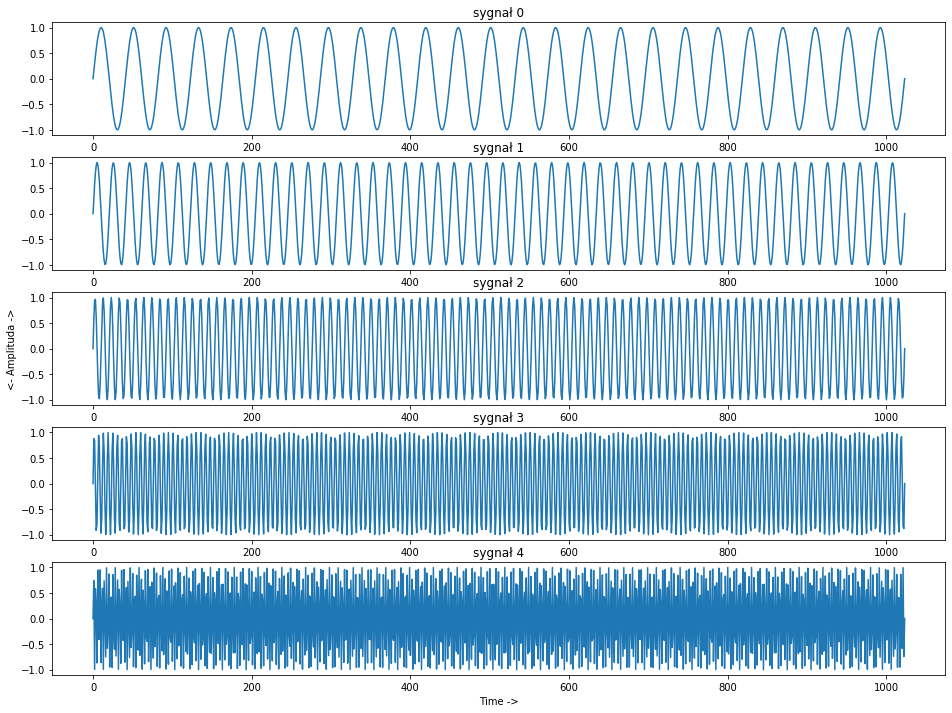

In [152]:
n = 1024
time = np.linspace(0, 50, n)
signals = [np.sin(np.pi * time), 
           np.sin(2 * np.pi * time), 
           np.sin(4 * np.pi * time), 
           np.sin(7 * np.pi * time), 
           np.sin(15 * np.pi * time)]


fig, axs = plt.subplots(5, figsize=(16,12))
axs[2].set_ylabel('<- Amplituda ->')
axs[4].set_xlabel('Time ->')

for i, signal in enumerate(signals):
    axs[i].set_title("sygnał " + str(i)) 
    axs[i].plot(signal)

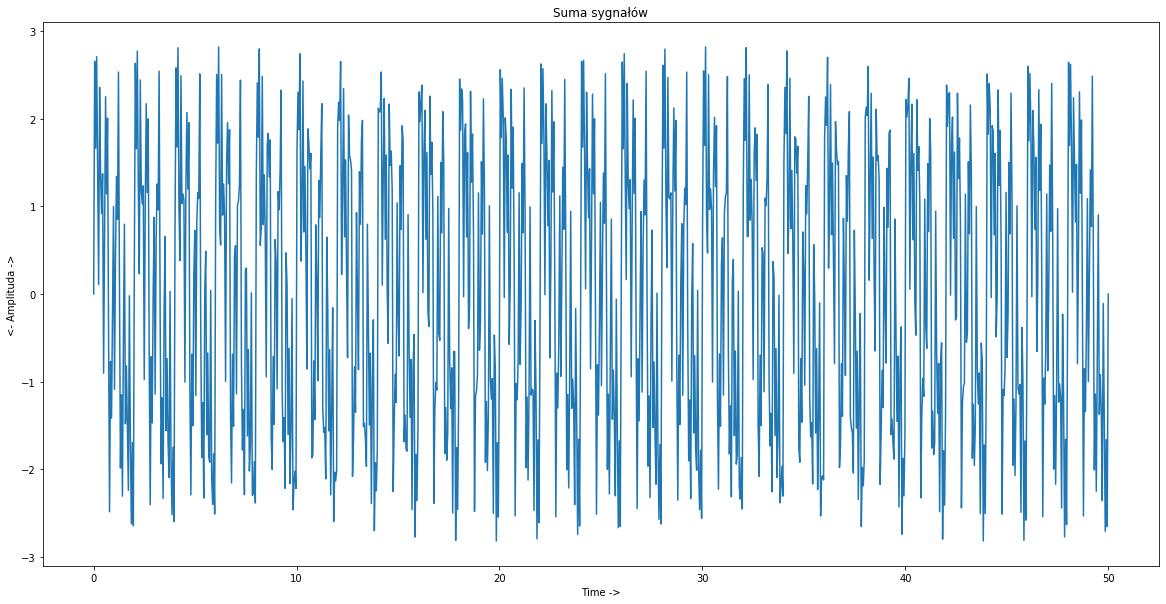

In [153]:
plt.figure(figsize=(20,10))
plt.title("Suma sygnałów")
plt.xlabel('Time ->')
plt.ylabel('<- Amplituda ->')

signals_sum = sum(signals)
plt.plot(time, signals_sum)

plt.show()

b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

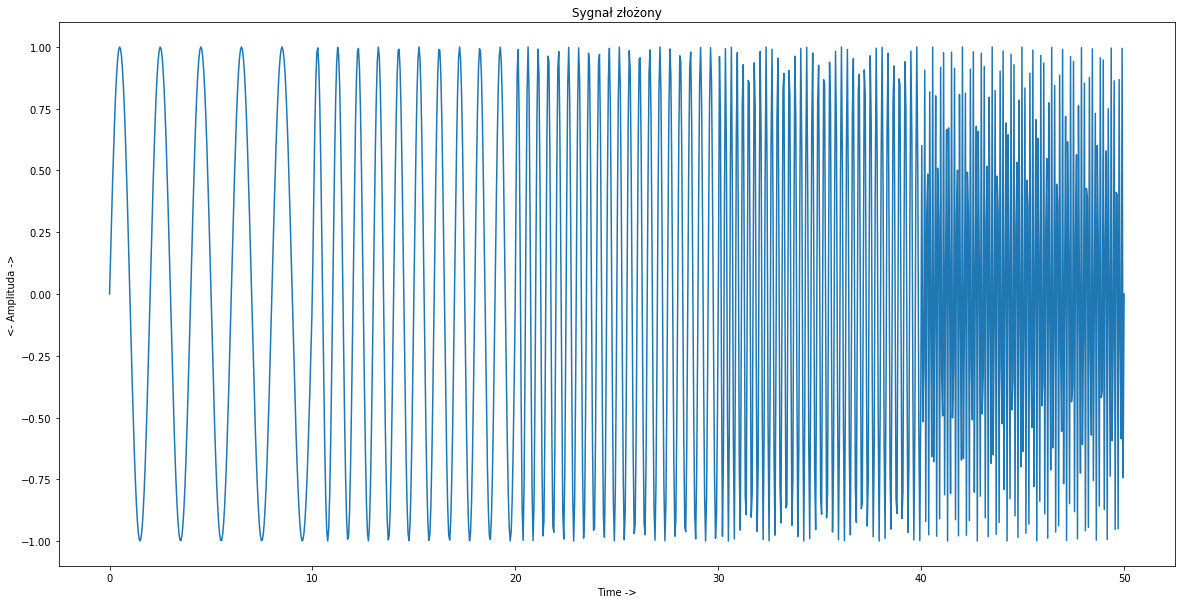

In [154]:
signal_ranges = np.zeros(n)
for i, lin in enumerate(time):
    signal_ranges[i] = signals[i // ((n // 5) + 1)][i]

plt.figure(figsize=(20,10))
plt.title("Sygnał złożony")
plt.xlabel('Time ->')
plt.ylabel('<- Amplituda ->')

plt.plot(time, signal_ranges)
plt.show()

2. Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji.

In [209]:
def plot_fft(y):
    fig, axs = plt.subplots(2, figsize=(16,8))
    x = np.linspace(0, 20, n//2)

    axs[0].set_title("Real part")
    axs[0].plot(x, y.real[:n//2])
    
    axs[1].set_title("Imaginary part")
    axs[1].plot(x, y.imag[:n//2], color='red')
    
    axs[1].set_xlabel('Częstotliwość ->')
    axs[1].set_ylabel('<- Rozmiar ->')

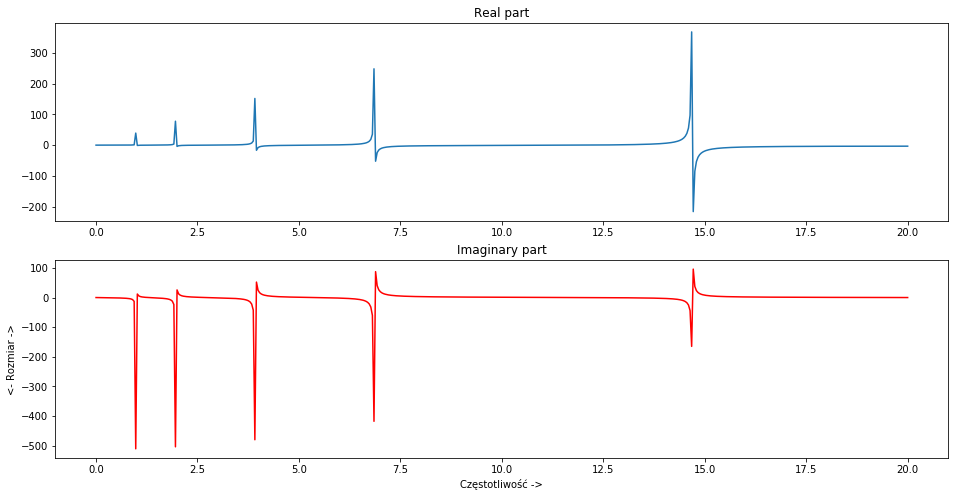

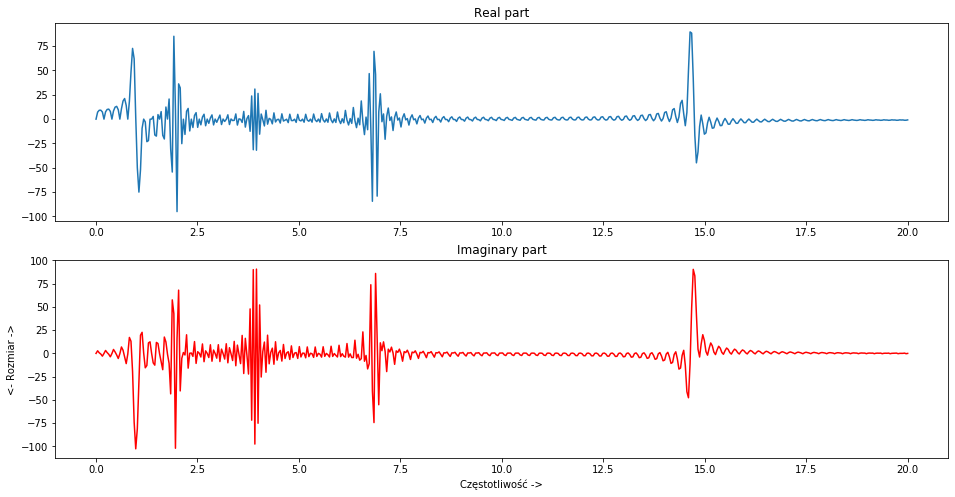

In [223]:
y_sum = FFT(signals_sum, n)
y_ranges = FFT(signal_ranges, n)

plot_fft(y_sum)
plot_fft(y_ranges)

### Wnioski:
 - Powyższy przykład pokazuje zastosowanie FFT, w tym wypadku mając sygnał złożony z wielu czestotliwości otrzymujemy informacje z jakich częstotliwości składał sie sygnał wejściowy.
 - Sygnał wejściowy był wykresem "od czasu", na wyjściu dostajemy wykres niezależny od czasu (a od częstotliwości) tak jak widać na poniższym obrazku:
<center><img src="FFT.png"></center>
 - Porównując oba sygnały wyraźnie widzimy, że składają się one z tych samych częstotliwości. To, że nie zostały one tak samo dodane/ułożone w tym wypadku ma marginalne znaczenie (szumy na drugim wykresie). Porównując oba sygnały zauważamy, że składają się z tych samych składowych.